In [2]:
## Import packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
## Load penguins data
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna().reset_index(drop = True)
X = penguins.drop(columns = 'species')
y = penguins['species']

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = X.drop(test_idxs)
y_train = y.drop(test_idxs)
X_test = X.loc[test_idxs]
y_test = y.loc[test_idxs]

## Get dummies
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

bagger1 = BaggingClassifier(n_estimators= 1000,random_state = 100)
bagger1.fit(X_train,y_train)

bagger2 = BaggingClassifier(estimator= GaussianNB(),random_state = 100)
bagger2.fit(X_train,y_train)


print(np.mean(bagger1.predict(X_test)== y_test))
print(np.mean(bagger2.predict(X_test)== y_test))

0.963855421686747
0.927710843373494


In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000,max_features = int(np.sqrt(X_test.shape[1])),random_state =200)
rf.fit(X_train,y_train)
print(np.mean(rf.predict(X_test)==y_test))

0.9879518072289156


In [18]:
y_train = (y_train == 'Adelie')
y_test = (y_test == 'Adelie')

In [19]:
from sklearn.ensemble import AdaBoostClassifier 
X_train = pd.get_dummies(X_train,drop_first = True)
X_test = pd.get_dummies(X_test,drop_first = True)

abc = AdaBoostClassifier(n_estimators= 50)
abc.fit(X_train,y_train)

y_test_hat = abc.predict(X_test)

np.mean(y_test_hat == y_test)


1.0

In [21]:
## Load penguins data
tips = sns.load_dataset('tips')
tips = tips.dropna().reset_index(drop = True)
X = tips.drop(columns = 'tip')
y = tips['tip']

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = X.drop(test_idxs)
y_train = y.drop(test_idxs)
X_test = X.loc[test_idxs]
y_test = y.loc[test_idxs]

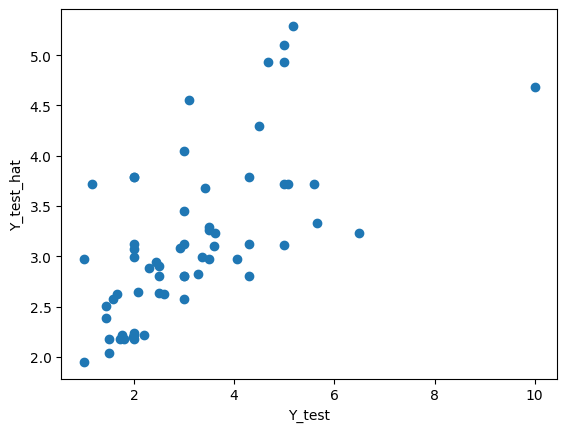

In [25]:
from sklearn.ensemble import AdaBoostRegressor

X_train = pd.get_dummies(X_train,drop_first = True)
X_test = pd.get_dummies(X_test,drop_first = True)

abr = AdaBoostRegressor(n_estimators = 50)
abr.fit(X_train,y_train)

y_test_hat = abr.predict(X_test)


plt.scatter(y_test,y_test_hat)
plt.xlabel("Y_test")
plt.ylabel("Y_test_hat")
plt.show()